<a href="https://colab.research.google.com/github/lustraka/Data_Analysis_Workouts/blob/main/Analyse_Twitter_Data/wrangle_act.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Wrangling and Analyze Data

This Jupyter notebook contains the complete code and basic documentation of the "Wrangle and Analyse Data" project that is part of Udacity's Data Analyst Nanodegreee Program. There are two other deliverables of the project:
- **WeRateDogs Data Wrangle Report** briefly describes our wrangling efforts.
- **Dog Breeds Popularity** (aka Act Report) communicates the insights and displays the visualization(s) produced from our wrangled data.

In [1]:
# Import dependencies
import requests
import os
import json
import tweepy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Gathering
(1) The WeRateDogs Twitter archive data (twitter_archive_enhanced.csv) is downloaded directly from a GitHub repository using `pd.read_csv`.

In [2]:
path_csv = 'https://raw.githubusercontent.com/lustraka/Data_Analysis_Workouts/main/Analyse_Twitter_Data/'
dfa = pd.read_csv(path_csv+'twitter-archive-enhanced.csv')
dfa.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


(2) The tweet image predictions (image_predictions.tsv) are downloaded from given URL using the `requests` library.

In [3]:
url_tsv = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url_tsv)
with open('image-predictions.tsv', 'wb') as file:
  file.write(r.content)
dfi = pd.read_csv('image-predictions.tsv', sep='\t')
dfi.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


(3) Additional data (tweet_json.txt) are gathered via the Twitter API using the `tweepy` library.

In [4]:
consumer_key = 'hidden'
consumer_secret = 'hidden'
access_token = 'hidden'
access_secret = 'hidden'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [5]:
from timeit import default_timer as timer

count = 0
fails_dict =  {}
start = timer()

if 'tweet_json.txt' in os.listdir():
  os.remove('tweet_json.txt')

with open('tweet_json.txt', 'a') as file:
  for tweet_id in dfa.tweet_id.values:
    count += 1
    if count % 42 == 0:
      print(str(count) + ' (' + str(tweet_id), end='): ')
    try:
      status = api.get_status(tweet_id, tweet_mode='extended')._json
      if count % 42 == 0:
        print("Success")
      file.write(json.dumps(status, ensure_ascii=False)+'\n')
    except tweepy.TweepError as e:
      if count % 42 == 0:
        print('Fail')
      fails_dict[tweet_id] = e
      pass
    except e:
      print('Fail', e)
end = timer()
print(f'Elapsed time: {end - start}')
print(fails_dict)

42 (884441805382717440): Success
84 (876537666061221889): Success
126 (868622495443632128): Success
168 (859851578198683649): Success
210 (852226086759018497): Success
252 (844979544864018432): Success
294 (837820167694528512): Success
336 (832645525019123713): Success
378 (828011680017821696): Success
420 (822244816520155136): Success
462 (817536400337801217): Success
504 (813066809284972545): Success
546 (805826884734976000): Success
588 (799757965289017345): Success
630 (794355576146903043): Success
672 (789960241177853952): Success
714 (784183165795655680): Success
756 (778748913645780993): Success
798 (773191612633579521): Success
840 (767191397493538821): Success
882 (760521673607086080): Success
924 (755955933503782912): Success
966 (750429297815552001): Success


Rate limit reached. Sleeping for: 639


1008 (747600769478692864): Success
1050 (743222593470234624): Success
1092 (737445876994609152): Success
1134 (728751179681943552): Success
1176 (720043174954147842): Success
1218 (714962719905021952): Success
1260 (710272297844797440): Success
1302 (707629649552134146): Success
1344 (704761120771465216): Success
1386 (700747788515020802): Success
1428 (697630435728322560): Success
1470 (694183373896572928): Success
1512 (691416866452082688): Success
1554 (688908934925697024): Success
1596 (686358356425093120): Success
1638 (684195085588783105): Success
1680 (682032003584274432): Success
1722 (680130881361686529): Success
1764 (678446151570427904): Success
1806 (676942428000112642): Success
1848 (675820929667219457): Success
1890 (674774481756377088): Success
1932 (674036086168010753): Success
1974 (673213039743795200): Success


Rate limit reached. Sleeping for: 638


2016 (672205392827572224): Success
2058 (671355857343524864): Success
2100 (670717338665226240): Success
2142 (669993076832759809): Success
2184 (668989615043424256): Success
2226 (668286279830867968): Success
2268 (667524857454854144): Success
2310 (666804364988780544): Success
2352 (666049248165822465): Success
Elapsed time: 1909.7809615459998
{888202515573088257: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 873697596434513921: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 872668790621863937: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 872261713294495745: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 869988702071779329: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 866816280283807744: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 861769973181624320: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 

Data gathered form Twitter API:

| Attribute | Type | Description |
| --- | :-: | --- |
| id | int | The integer representation of unique identifier for this Tweet |
| retweet_count | int | Number of times this Tweet has been retweeted. |
| favorite_count | int | *Nullable*. Indicates approximately how many times this tweet has been liked by Twitter users. |

Reference: [Tweepy docs: Tweet Object](https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/tweet)



In [6]:
df_tweets = []
with open('tweet_json.txt', 'r') as file:
  line = file.readline()
  while line:
    status = json.loads(line)
    df_tweets.append({'tweet_id': status['id'], 'retweet_count': status['retweet_count'], 'favorite_count': status['favorite_count']})
    line = file.readline()
dft = pd.DataFrame(df_tweets)
dft.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7158,34422
1,892177421306343426,5382,29853
2,891815181378084864,3549,22471
3,891689557279858688,7366,37610
4,891327558926688256,7916,35929


## Assessing Data
Key assumptions:
* We only want original ratings (no retweets or replies) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time. Therefore, we will assess and clean 8 quality issues and 3 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* We will gather the additional tweet data only for tweets in the *twitter_archive_enhanced.csv* dataset.



### The archive `twitter_archive_enhanced.csv` (alias `dba`)
> "I extracted this data programmatically, but I didn't do a very good job. The ratings probably aren't all correct. Same goes for the dog names and probably dog stages (see below for more information on these) too. You'll need to assess and clean these columns if you want to use them for analysis and visualization."

In [7]:
dfa.sample(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1340,704859558691414016,NaN,NaN,2016-03-02 02:43:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a heartbreaking scene of an incredible...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704859558...,10,10,a,None,None,pupper,None
943,752701944171524096,NaN,NaN,2016-07-12 03:11:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: HEY PUP WHAT'S THE PART OF THE ...,6.835159e+17,4.196984e+09,2016-01-03 05:11:12 +0000,"https://vine.co/v/ibvnzrauFuV,https://vine.co/...",11,10,None,None,None,None,None
27,886736880519319552,NaN,NaN,2017-07-16 23:58:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mingus. He's a wonderful father to his...,NaN,NaN,NaN,"https://www.gofundme.com/mingusneedsus,https:/...",13,10,Mingus,None,None,None,None
2170,669351434509529089,NaN,NaN,2015-11-25 03:06:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sully. He's a Leviticus Galapagos. Ver...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669351434...,10,10,Sully,None,None,None,None
597,798694562394996736,NaN,NaN,2016-11-16 01:09:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: I'm not sure what's happening h...,7.012147e+17,4.196984e+09,2016-02-21 01:19:47 +0000,https://twitter.com/dog_rates/status/701214700...,12,10,None,None,None,None,None
1789,677547928504967168,NaN,NaN,2015-12-17 17:56:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Not much to say here. I just think everyone ne...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677547928...,12,10,None,None,None,None,None
1931,674036086168010753,NaN,NaN,2015-12-08 01:21:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Daisy. She has no eyes &amp; her face has...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674036086...,9,10,Daisy,None,None,None,None
614,796759840936919040,NaN,NaN,2016-11-10 17:02:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Romeo. He was just told that it's...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/796759840...,11,10,Romeo,None,None,None,None
2263,667544320556335104,NaN,NaN,2015-11-20 03:25:43 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","This is Kial. Kial is either wearing a cape, w...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/667544320...,10,10,Kial,None,None,None,None
1914,674330906434379776,6.658147e+17,16374678.0,2015-12-08 20:53:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13/10\n@ABC7,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None


In [8]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
for col in dfa.columns[[10,11,13,14,15,16]]:
  print(dfa[col].unique())

[  13   12   14    5   17   11   10  420  666    6   15  182  960    0
   75    7   84    9   24    8    1   27    3    4  165 1776  204   50
   99   80   45   60   44  143  121   20   26    2  144   88]
[ 10   0  15  70   7  11 150 170  20  50  90  80  40 130 110  16 120   2]
['None' 'doggo']
['None' 'floofer']
['None' 'pupper']
['None' 'puppo']


#### Curated `twitter_archive_enhanced.csv` Info

| # | Variable | Non-Null | Nunique | Dtype | Notes |
|---|----------|----------|---------|-------|-------|
| 0 | tweet_id | 2356 | 2356 | int64  | |
| 1 | in_reply_to_status_id | 78 | 77 | float64 | these tweets are replies |
| 2 | in_reply_to_user_id | 78 | 31 | float64 | see $\uparrow$ |
| 3 | timestamp | 2356 | 2356 | object | object $\to$ datetime | 
| 4 | source | 2356 | 4 | object | |
| 5 | text | 2356 | 2356 | object | some tweets don't have an image (1) |
| 6 | retweeted_status_id | 181 | 181 | float64 | these are retweets |
| 7 | retweeted_status_user_id | 181 | 25 | float64 | see $\uparrow$ |
| 8 | retweeted_status_timestamp | 181 | 181 | object | see $\uparrow$ |
| 9 | expanded_urls | 2297 | 2218 | object | missing values |
| 10 | rating_numerator | 2356 | 40 | int64  | entries with numerator $> 20$ may be incorrect (4a) |
| 11 | rating_denominator | 2356 | 18 | int64  | entries with denominator $\neq 10$ may be incorrect (4b) |
| 12 | name | 2356 | 957 | object | incorrect names or missing values (2) |
| 13 | doggo | 2356 | 2 | object | a value as a column + (3) some misclassified stages|
| 14 | floofer | 2356 | 2 | object | see $\uparrow$ |
| 15 | pupper | 2356 | 2 | object | see $\uparrow$ |
| 16 | puppo | 2356 | 2 | object | see $\uparrow$ |

Source: visual and programmatic assessment

```python
# #, Variable, Non-Null (Count), Dtype:
dfa.info()
# Nunique:
dfa.nunique()
# Check unique values
for col in dfa.columns[[10,11,13,14,15,16]]:
  print(dfa[col].unique())
# Notes
# (1) Some tweets don't have an image
dfa.loc[dfa.text.apply(lambda s: 'https://t.co' not in s)].shape[0]
# [Out] 124
```

In [10]:
# (2a) Incorrect names - begin with a lowercase
import re
print(re.findall(r';([a-z].*?);', ';'.join(dfa.name.unique())))

['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an', 'very', 'just', 'my', 'his', 'actually', 'getting', 'this', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']


In [11]:
# (2b) Incorrect names - None
dfa.loc[dfa.name == 'None'].shape[0]

745

In [12]:
# (3a) Misclassified stages - indicated in the stage but not present in the text
stages = ['doggo', 'pupper', 'puppo', 'floofer']
print('Stage     | Total | Misclassified |')
print('-'*35)
for stage in stages:
  total = dfa.loc[dfa[stage] == stage].shape[0]
  missed = dfa.loc[(dfa[stage] == stage) & (dfa.text.apply(lambda s: stage not in s.lower()))].shape[0]
  print(f"{stage.ljust(9)} | {total:5d} | {missed:13d} |")

Stage     | Total | Misclassified |
-----------------------------------
doggo     |    97 |             0 |
pupper    |   257 |             0 |
puppo     |    30 |             0 |
floofer   |    10 |             0 |


In [13]:
# (3b) Misclassified stages - not indicated in the stage but is present in the text
stages = ['doggo', 'pupper', 'puppo', 'floofer']
print('Stage     | Total | Misclassified |')
print('-'*35)
for stage in stages:
  total = dfa.loc[dfa[stage] == stage].shape[0]
  missed = dfa.loc[(dfa[stage] != stage) & (dfa.text.apply(lambda s: stage in s.lower()))].shape[0]
  print(f"{stage.ljust(9)} | {total:5d} | {missed:13d} |")

Stage     | Total | Misclassified |
-----------------------------------
doggo     |    97 |            10 |
pupper    |   257 |            26 |
puppo     |    30 |             8 |
floofer   |    10 |             0 |


##### Note (4) Ratings where `rating_numerator` $ > 20$ or  `rating_denomiator` $\neq 10$
Code used:
```python
# Show the whole text
pd.options.display.max_colwidth = None

# (4a) Show tweets with possibly incorrect rating : rating_numerator > 20
dfa.loc[dfa.rating_numerator > 20, ['text', 'rating_numerator', 'rating_denominator']]

# (4b) Show tweets with possibly incorrect rating : rating_denominator != 10
dfa.loc[dfa.rating_denominator != 10, ['text', 'rating_numerator', 'rating_denominator']]

```
In cases where users used float numbers, such as 9.75/10 or 11.27/10, we will use the floor rounding, i.e. 9/10 or 11/10 respectively. We will correct only those rating which were incorrectly identified in the text. Ratings with weird values used in the text are left unchanged cos they're good dogs Brent.

Results:

In [14]:
# Show the whole text
pd.options.display.max_colwidth = None

# Fill dict with key = index and value = correct rating
incorrect_rating = {313 : '13/10', 340 : '9/10', 763: '11/10', 313 : '13/10', 784 : '14/10', 1165 : '13/10', 1202 : '11/10', 1662 : '10/10', 2335 : '9/10'}

# Indicate tweets with missing rating
missing_rating = [342, 516]

# Show tweet with incorrectly identified rating
dfa.loc[list(incorrect_rating.keys()), ['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
784,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1662,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,7,11
2335,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,1,2


### The Tweet Image Predictions `image_predictions.tsv`
> "A table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images)."

In [15]:
dfi.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
924,702321140488925184,https://pbs.twimg.com/media/Cb8lWafWEAA2q93.jpg,3,West_Highland_white_terrier,0.769159,True,Scotch_terrier,0.064369,True,Old_English_sheepdog,0.043763,True
1726,820314633777061888,https://pbs.twimg.com/media/C2JXyARUAAE4gbL.jpg,2,Gordon_setter,0.940724,True,black-and-tan_coonhound,0.042041,True,Rottweiler,0.009417,True
742,687460506001633280,https://pbs.twimg.com/media/CYpZrtDWwAE8Kpw.jpg,1,Boston_bull,0.223366,True,boxer,0.183596,True,French_bulldog,0.176916,True
923,702276748847800320,https://pbs.twimg.com/media/Cb78-nOWIAENNRc.jpg,1,Boston_bull,0.697303,True,French_bulldog,0.239015,True,American_Staffordshire_terrier,0.019838,True
1433,773547596996571136,https://pbs.twimg.com/media/Crwxb5yWgAAX5P_.jpg,1,Norwegian_elkhound,0.372202,True,Chesapeake_Bay_retriever,0.137187,True,malamute,0.071436,True
1462,778383385161035776,https://pbs.twimg.com/media/Cs1fjyqWIAE2jop.jpg,1,collie,0.345266,True,borzoi,0.312823,True,Border_collie,0.213011,True
1687,814986499976527872,https://pbs.twimg.com/media/C09p5dJWIAE5qKL.jpg,1,dalmatian,0.999828,True,boxer,0.000068,True,American_Staffordshire_terrier,0.000034,True
1377,763837565564780549,https://pbs.twimg.com/media/CpmyNumW8AAAJGj.jpg,1,malamute,0.375098,True,jean,0.069362,False,keeshond,0.050528,True
676,683462770029932544,https://pbs.twimg.com/media/CXwlw9MWsAAc-JB.jpg,1,Italian_greyhound,0.399560,True,whippet,0.267153,True,German_short-haired_pointer,0.081319,True
908,700505138482569216,https://pbs.twimg.com/media/Cbixs3vUUAAqHHN.jpg,1,bath_towel,0.449684,False,Norwegian_elkhound,0.160205,True,Great_Dane,0.048666,True


In [16]:
dfi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Curated Info

| # | Variable | Non-Null | Nunique | Dtype | Notes |
|---|----------|----------|---------|-------|-------|
| 0 | tweet_id | 2075 | 2078 | int64 | |
| 1 | jpg_url | 2075 | 2009 | object | |
| 2 | img_num | 2075 | 4 | int64 | the image number that corresponded to the most confident prediction|
| 3 | p1 | 2075 | 378 | object | prediction |
| 4 | p1_conf | 2075 | 2006 | float64 | confidence of prediction |
| 5 | p1_dog | 2075 | 2 | int64 | Is the prediction a breed of dog? : int $\to$ bool |
| 6 | p2 | 2075 | 405 | object | dtto |
| 7 | p2_conf | 2075 | 2004 | float64 | dtto |
| 8 | p2_dog | 2075 | 2 | int64 | dtto |
| 9 | p3 | 2075 | 408 | object | dtto |
| 10 | p3_conf | 2075 | 2006 | float64 | dtto |
| 11 | p3_dog | 2075 | 2 | int64 | dtto |

Source: visual and programmatic assessment

```python
# #, Variable, Non-Null (Count), Dtype:
dfa.info()
# Nunique:
dfa.nunique()
```


### Additional Data From Twitter API

In [17]:
dft.sample(10)

,tweet_id,retweet_count,favorite_count
336,831322785565769729,1474,8928
850,761292947749015552,1027,4289
5,891087950875897856,2661,18127
136,864279568663928832,2629,13297
1818,675820929667219457,218,975
532,804738756058218496,3671,13250
876,758467244762497024,2072,4578
515,807621403335917568,3465,14125
2029,671347597085433856,381,864
265,840268004936019968,5345,18295


In [18]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


#### Curated Info

| # | Variable | Non-Null | Nunique | Dtype | Notes |
|---|----------|----------|---------|-------|-------|
| 0 | tweet_id | 2327 | 2327 | int64 | |
| 1 | retweet_count | 2327 | 1671 | int64 | |
| 2 | favorite_count | 2327 | 2006 | int64 | |

Source: visual and programmatic assessment

```python
# #, Variable, Non-Null (Count), Dtype:
dfa.info()
# Nunique:
dfa.nunique()
```

### Quality issues
1. Replies are not original tweets.
2. Retweets are not original tweets.
3. Some tweets don't have any image
4. Some ratings are incorrectly identified
5. Some ratings are missing
6. Names starting with lowercase are incorrect
7. Names with value None are incorrect
8. Column timestamp has the dtype object (string)


### Tidiness issues
1. Dogs' stages (doggo, pupper, puppo, floofer) as columns
2. Multiple image predictions in one row
3. Data in multiple datasets

## Cleaning Data
In this section, we will clean all of the issues documented above. 

In [19]:
# Make copies of original pieces of data
dfa_clean = dfa.copy() # archive
dfi_clean = dfi.copy() # image predictions
dft_clean = dft.copy() # data from Twitter API

### Q1: Replies are not original tweets.

#### Define:
- Remove replies from `dfa_clean` dataframe by preserving only observations where `dfa_clean.in_reply_to_status_id.isna()` 
- Then drop variables *in_reply_to_status_id* and *in_reply_to_user_id*. We don't need them any more.

#### Code

In [20]:
dfa_clean = dfa_clean.loc[dfa_clean.in_reply_to_status_id.isna()]
print('Check the emptiness of the in_reply_to_status_id (sum should be 0): ', dfa_clean.in_reply_to_status_id.notna().sum())
dfa_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id'], inplace=True)

Check the emptiness of the in_reply_to_status_id (sum should be 0):  0


#### Test

In [21]:
dfa_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2278 non-null   int64  
 1   timestamp                   2278 non-null   object 
 2   source                      2278 non-null   object 
 3   text                        2278 non-null   object 
 4   retweeted_status_id         181 non-null    float64
 5   retweeted_status_user_id    181 non-null    float64
 6   retweeted_status_timestamp  181 non-null    object 
 7   expanded_urls               2274 non-null   object 
 8   rating_numerator            2278 non-null   int64  
 9   rating_denominator          2278 non-null   int64  
 10  name                        2278 non-null   object 
 11  doggo                       2278 non-null   object 
 12  floofer                     2278 non-null   object 
 13  pupper                      2278 

### Q2: Retweets are not original tweets.

#### Define
- Remove retweets from `dfa_clean` by preserving only observation where `dfa_clean.retweeted_status_id.isna()`, i.e. empty.
- Then drop variables *retweeted_status_id*, *retweeted_status_user_id*, and *retweeted_status_timestamp*. We don't need them any more

#### Code

In [22]:
dfa_clean = dfa_clean.loc[dfa_clean.retweeted_status_id.isna()]
print('Check the emptiness of the retweeted_status_id (sum should be 0): ', dfa_clean.retweeted_status_id.notna().sum())
dfa_clean.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True)

Check the emptiness of the retweeted_status_id (sum should be 0):  0


#### Test

In [23]:
dfa_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


### Q3: Some tweets don't have any image

#### Define
Remove tweets that don't have image from `dfa_clean`. We detect an image by an occurence of the string 'https://t.co' in the *text* variable.

#### Code

In [24]:
dfa_clean = dfa_clean.loc[dfa_clean.text.apply(lambda s: 'https://t.co' in s)]

#### Test

In [25]:
dfa_clean.loc[dfa_clean.text.apply(lambda s: 'https://t.co' not in s)].shape[0]

0

### Q4: Some ratings are incorrectly identified

#### Define
Updat the incorrect ratings with the correct ones (both numerator and denominator being stored in a dictionary *incorrect_rating* during assessment).

#### Code

In [26]:
# Some observations could have been removed in previous steps
ratings_to_update = dfa_clean.index.intersection(list(incorrect_rating.keys()))

In [27]:
for rating in ratings_to_update:
  dfa_clean.at[rating,'rating_numerator'] = incorrect_rating[rating].split('/')[0]
  dfa_clean.at[rating, 'rating_denominator'] = incorrect_rating[rating].split('/')[1]

#### Test

In [28]:
# Show the whole text
pd.options.display.max_colwidth = None
# Show tweets
dfa_clean.loc[ratings_to_update, ['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11,10
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,13,10
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,11,10
1662,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,10,10
2335,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,9,10


In [29]:
dfa_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2094 non-null   int64 
 1   timestamp           2094 non-null   object
 2   source              2094 non-null   object
 3   text                2094 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2094 non-null   int64 
 6   rating_denominator  2094 non-null   int64 
 7   name                2094 non-null   object
 8   doggo               2094 non-null   object
 9   floofer             2094 non-null   object
 10  pupper              2094 non-null   object
 11  puppo               2094 non-null   object
dtypes: int64(3), object(9)
memory usage: 292.7+ KB


### Q5: Some ratings are missing

#### Define
Delete observations with missing rating in `dfa_clean` identified in the variable *missing_rating* during assessment.

#### Code

In [30]:
# Some observations could have been removed
tweets_to_delete = dfa_clean.index.intersection(missing_rating)
# Delete tweets without rating
dfa_clean.drop(index=tweets_to_delete, inplace=True)

#### Test

In [31]:
# Should be empty
dfa_clean.index.intersection(missing_rating)

Int64Index([], dtype='int64')

### Q6: Names starting with lowercase are incorrect

#### Define
- Identify incorrect names in `dfa_clean` using a regular expression and store them in a list `incorrect_names`. Incorrect names start with a lowercase letter.
- Replace incorrect names in `dfa_clean` with an empty string using a user defined function `clean_names(name)`.

#### Code

In [32]:
# Join all names to one string separated by ';;'
# Find all incorrect names using a regular expresion
incorrect_names = re.findall(r';([a-z].*?);', ';;'.join(dfa_clean.name.unique()))

def clean_names(name):
  """If a name is in a global variable `incorrect_names`, 
      replace it by empty string,
      otherwise return the original name."""

  if name in incorrect_names:
    return ''
  else:
    return name

# Apply the clean_names func on the variable 'name'
dfa_clean['name'] = dfa_clean.name.apply(clean_names)

#### Test

In [33]:
# Should be empty
print(re.findall(r';([a-z].*?);', ';;'.join(dfa_clean.name.unique())))

[]


### Q7: Names with value None are incorrect

#### Define
Replace names 'None' in `dfa_clean` with an empty string.

#### Code

In [34]:
dfa_clean['name'] = dfa_clean.name.apply(lambda name: '' if name == 'None' else name)

#### Test

In [35]:
# Should be zero
dfa_clean.query('name == "None"').shape[0]

0

In [36]:
dfa_clean.name.value_counts()[:10]

           704
Charlie     11
Lucy        11
Oliver      10
Cooper      10
Tucker       9
Penny        9
Winston      8
Sadie        8
Lola         8
Name: name, dtype: int64

### Q8: Column timestamp has the dtype object (string)

#### Define
Convert variable *timestamp* in `dfa_clean` to datetime.

#### Code

In [37]:
dfa_clean['timestamp'] = pd.to_datetime(dfa_clean.timestamp)

#### Test

In [38]:
dfa_clean.timestamp.dtype

datetime64[ns, UTC]

### T1: Dogs' stages (doggo, pupper, puppo, floofer) as columns

#### Define
Derive a new variable *stage* from variables *doggo, pupper, puppo, floofer*. Fill an empty string if no stage indicated. Then drop exploited variables.

#### Code

In [39]:
def get_stage(row):
  """Fill the stage or an empty string (if the stage is not identified)."""

  stage = set([row['doggo'], row['pupper'], row['puppo'], row['floofer']])
  if len(stage) > 1:
    return list(stage.difference({'None'}))[0]
  else:
    return ''

dfa_clean['stage'] = dfa_clean.apply(get_stage, axis=1)
dfa_clean.drop(columns=['doggo', 'pupper', 'puppo', 'floofer'], inplace=True)

#### Test

In [40]:
dfa_clean.stage.value_counts()

           1758
pupper      220
doggo        83
puppo        23
floofer       9
Name: stage, dtype: int64

In [41]:
dfa_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2093 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2093 non-null   int64              
 1   timestamp           2093 non-null   datetime64[ns, UTC]
 2   source              2093 non-null   object             
 3   text                2093 non-null   object             
 4   expanded_urls       2093 non-null   object             
 5   rating_numerator    2093 non-null   int64              
 6   rating_denominator  2093 non-null   int64              
 7   name                2093 non-null   object             
 8   stage               2093 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 163.5+ KB


### T2: Multiple image predictions in one row

#### Define
Extract the most confident prediction of a breed of dog. Drop exploited columns and remove observations without a prediction.

#### Code

In [42]:
def get_breed(row):
  """Extract the most confident prediction of a breed of dog."""

  predictions = [[row['p1'], row['p1_conf'], row['p1_dog']],
                 [row['p2'], row['p2_conf'], row['p2_dog']],
                 [row['p3'], row['p3_conf'], row['p3_dog']]]
  
  # Filter predictions of a bread of dog
  dogs = list(filter(lambda x: x[2], predictions))
  # Sort predictions accoring to confidence
  best = sorted(dogs, key=lambda x: x[1], reverse=True)

  # Return the best prediction
  if len(best) == 0:
    return ''
  else:
    return str(best[0][0]).replace('_', ' ').title()

dfi_clean['breed'] = dfi_clean.apply(get_breed, axis=1)
dfi_clean.drop(columns=['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], inplace=True)

In [43]:
# Remove tweets without a prediction
dfi_clean = dfi_clean.query('breed != ""')

#### Test

In [44]:
dfi_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  1751 non-null   int64 
 1   jpg_url   1751 non-null   object
 2   img_num   1751 non-null   int64 
 3   breed     1751 non-null   object
dtypes: int64(2), object(2)
memory usage: 68.4+ KB


In [45]:
print(sorted(dfi_clean.breed.unique()))

['Afghan Hound', 'Airedale', 'American Staffordshire Terrier', 'Appenzeller', 'Australian Terrier', 'Basenji', 'Basset', 'Beagle', 'Bedlington Terrier', 'Bernese Mountain Dog', 'Black-And-Tan Coonhound', 'Blenheim Spaniel', 'Bloodhound', 'Bluetick', 'Border Collie', 'Border Terrier', 'Borzoi', 'Boston Bull', 'Bouvier Des Flandres', 'Boxer', 'Brabancon Griffon', 'Briard', 'Brittany Spaniel', 'Bull Mastiff', 'Cairn', 'Cardigan', 'Chesapeake Bay Retriever', 'Chihuahua', 'Chow', 'Clumber', 'Cocker Spaniel', 'Collie', 'Curly-Coated Retriever', 'Dalmatian', 'Dandie Dinmont', 'Doberman', 'English Setter', 'English Springer', 'Entlebucher', 'Eskimo Dog', 'Flat-Coated Retriever', 'French Bulldog', 'German Shepherd', 'German Short-Haired Pointer', 'Giant Schnauzer', 'Golden Retriever', 'Gordon Setter', 'Great Dane', 'Great Pyrenees', 'Greater Swiss Mountain Dog', 'Groenendael', 'Ibizan Hound', 'Irish Setter', 'Irish Terrier', 'Irish Water Spaniel', 'Irish Wolfhound', 'Italian Greyhound', 'Japane

### T3: Data in multiple datasets

#### Define
Merge archive `dfa_clean`, breed predictions `dfi_clean`, and metrics `dft_clean` into `df_clean` for further analysis and visualization.

#### Code

In [46]:
df_clean = dfa_clean.merge(dfi_clean, how='inner', on='tweet_id')
df_clean = df_clean.merge(dft_clean, how='inner', on='tweet_id')

#### Test

In [47]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1657 entries, 0 to 1656
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1657 non-null   int64              
 1   timestamp           1657 non-null   datetime64[ns, UTC]
 2   source              1657 non-null   object             
 3   text                1657 non-null   object             
 4   expanded_urls       1657 non-null   object             
 5   rating_numerator    1657 non-null   int64              
 6   rating_denominator  1657 non-null   int64              
 7   name                1657 non-null   object             
 8   stage               1657 non-null   object             
 9   jpg_url             1657 non-null   object             
 10  img_num             1657 non-null   int64              
 11  breed               1657 non-null   object             
 12  retweet_count       1657 non-null 

In [48]:
# Set the default value for max_colwidth
pd.options.display.max_colwidth = 50

df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,breed,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,5382,29853
1,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,3549,22471
2,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador Retriever,7366,37610
3,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,7916,35929
4,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,,,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake Bay Retriever,2661,18127


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv" and to an SQlite database for further exploration.

In [49]:
with open('twitter_archive_master.csv', 'w') as file:
  df_clean.to_csv(file)

In [50]:
# Store the dataframe for further processing
from sqlalchemy import create_engine

# Create SQLAlchemy engine and empty database
engine = create_engine('sqlite:///weratedogsdata_clean.db')

# Store dataframes in database
df_clean.to_sql('df_clean', engine, index=False)

## Analyzing and Visualizing Data
### Extended Info for the Cleaned Dataset

| # | Variable | Non-Null | Nunique | Dtype | Notes |
|---|----------|----------|---------|-------|-------|
| 0 | tweet_id | 1657 | 1657 | int64 | The Tweet's unique identifier .|
| 1 | timestamp | 1657 | 1657 | datetime64[ns, UTC] | Time when this Tweet was created. |
| 2 | source | 1657 | 3 | object | Utility used to post the Tweet. |
| 3 | text | 1657 | 1657 | object | The actual text of the status update. |
| 4 | expanded_urls | 1657 | 1657 | object | The URLs of the Tweet's photos. |
| 5 | rating_numerator | 1657 | 26 | int64 | The rating numerator extracted from the text. |
| 6 | rating_denominator | 1657 | 10 | int64 | The rating denominator extracted from the text. |
| 7 | name | 1657 | 831 | object | The dog's name extracted from the text. |
| 8 | stage | 1657 | 5 | object | The dog's stage extracted from the text.|
| 9 | jpg_url | 1657 | 1657 | object | The URL of the image used to classify the breed of dog. |
| 10 | img_num | 1657 | 4 | int64 | The image number that corresponded to the most confident prediction.  |
| 11 | breed | 1657 | 113 | object | The most confident classification of the breed of dog predicted from the image. |
| 12 | retweet_count | 1657 | 1352 | int64 | Number of times this Tweet has been retweeted. |
| 13 | favorite_count | 1657 | 1561 | int64 | Indicates approximately how many times this Tweet has been liked by Twitter users. |

In [51]:
df_clean.timestamp.min(), df_clean.timestamp.max()

(Timestamp('2015-11-15 22:32:08+0000', tz='UTC'),
 Timestamp('2017-08-01 00:17:27+0000', tz='UTC'))

The cleaned dataset has 1657 observations starting at the November 15th, 2015 when the WeRateDogs Twitter account was launched and ending at the August 17th, 2017 when the archive was exported.

**Assumptions**:
- Variables *rating_numerator, rating_denominator, name,* and *stage* was extracted from the tweet's text. The rating is a part of a humorous aspect of the content. There is hardly any value in analysing these variables.
- The variable *breed* is inferred from the image using machine learning algorithm. We can use this variable keeping on mind that there can be some inaccuracies.
- The variables *favorite_count*, and *retweet_count* reflects the preferences of Twitter users. We can use these variables keeping in mind they come from a non-random sample of human population.

### Insight 1: Most Popular Dog Names
The top 10 most popular dog names in our dataset are: 

In [52]:
print(list(df_clean.name.value_counts(ascending=True)[-11:-1].index)[::-1])

['Cooper', 'Oliver', 'Tucker', 'Charlie', 'Lucy', 'Penny', 'Winston', 'Sadie', 'Daisy', 'Toby']


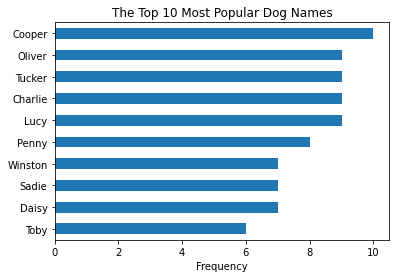

In [53]:
df_clean.name.value_counts(ascending=True)[-11:-1].plot(kind='barh', title='The Top 10 Most Popular Dog Names')
plt.xlabel('Frequency');

### Insight 2: Most Popular Dog Breeds
The top 10 most popular dog breeds according to number of tweets.

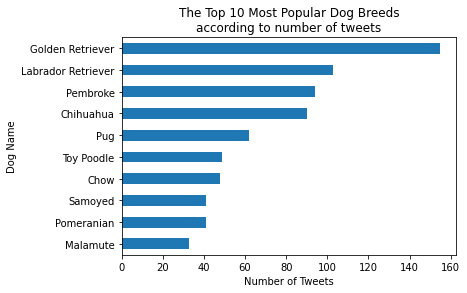

In [54]:
df_clean.breed.value_counts(ascending=True)[-10:].plot(kind='barh', title='The Top 10 Most Popular Dog Breeds\naccording to number of tweets')
plt.ylabel('Dog Name')
plt.xlabel('Number of Tweets');

The top 10 most popular dog breeds according to number of likes:

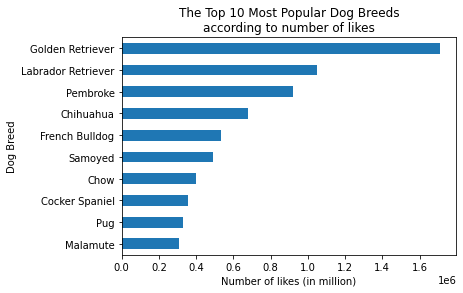

In [55]:
df_clean.groupby('breed')['favorite_count'].sum().sort_values().tail(10).plot(kind='barh', title='The Top 10 Most Popular Dog Breeds\naccording to number of likes')
plt.ylabel('Dog Breed')
plt.xlabel('Number of likes (in million)');

The top 10 most popular dog breeds according to number of retweets:

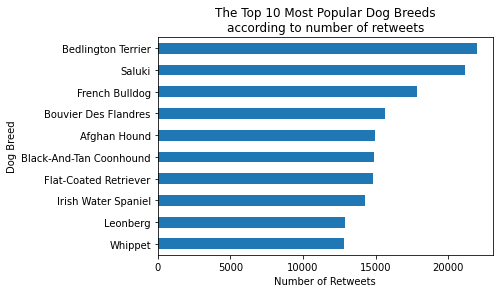

In [56]:
df_clean.groupby('breed')['favorite_count'].mean().sort_values().tail(10).plot(kind='barh', title='The Top 10 Most Popular Dog Breeds\naccording to number of retweets')
plt.ylabel('Dog Breed')
plt.xlabel('Number of Retweets');

**Insight 2 Conclusions**
- The popularity rank of a dog breed depends on a metric used. Comparision of number of tweets and number of likes is quite similar.
- In the comparison of absolute number of likes (sum) and average number of likes (mean), the rank of dog breeds differs due to frequency of tweets.

### Insight 3: Relation Between Favourite Count and Retweet Count

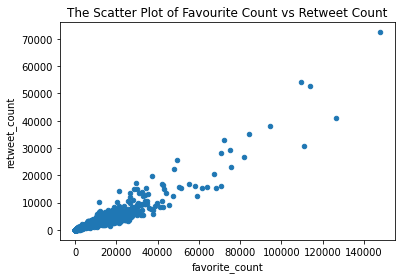

In [57]:
df_clean.plot(kind='scatter', x='favorite_count', y='retweet_count', title='The Scatter Plot of Favourite Count vs Retweet Count');

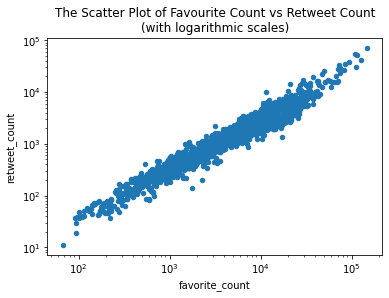

In [58]:
df_clean.plot(kind='scatter', x='favorite_count', y='retweet_count', logx=True, logy=True, title='The Scatter Plot of Favourite Count vs Retweet Count\n(with logarithmic scales)');

In [59]:
import statsmodels.api as sm
df_clean['intercept'] = 1
lm = sm.OLS(df_clean['retweet_count'], df_clean[['intercept', 'favorite_count']])
res = lm.fit()
res.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          retweet_count   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                 1.063e+04
Date:                Wed, 13 Oct 2021   Prob (F-statistic):               0.00
Time:                        10:58:08   Log-Likelihood:                -14542.
No. Observations:                1657   AIC:                         2.909e+04
Df Residuals:                    1655   BIC:                         2.910e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept       -351.7027     46.588     -7.549      0.000    -443.080    -260.325
favorite_count     0.3293      0.003    103.109      0.000       0.323       0.336
==============================================================================
Omnibus:                     1543.497   Durbin-Watson:                   1.256
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           219060.889
Skew:                           3.859   Prob(JB):                         0.00
Kurtosis:                      58.797   Cond. No.                     1.76e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.76e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
# Compute the correlation coefficient
np.sqrt(res.rsquared)

0.9302147393089879

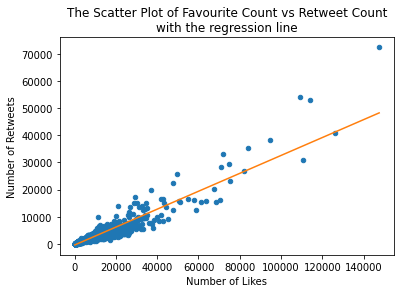

In [61]:
df_clean.plot(kind='scatter', x='favorite_count', y='retweet_count', title='The Scatter Plot of Favourite Count vs Retweet Count\nwith the regression line')
fav_min_max = [df_clean.favorite_count.min(), df_clean.favorite_count.max()]
# Draw a regression line using 'res.params'
plt.plot(fav_min_max, [res.params.intercept + res.params.favorite_count*x for x in fav_min_max], color='tab:orange')
plt.xlabel('Number of Likes')
plt.ylabel('Number of Retweets')
plt.show()

**Insight 3 Conclusions**:
- Variables *favourite_count* and *retweet_count* are highly correlated (with the regression coefficient of 0.93).
- For ever 1000 increase in number of likes we can predict 329 more retweets.
- The linear relationship is observable in scatter plots with both normal and logarithmic scales. The last scatter plot shows *favorite_count* versus *retweet_count* with the linear regression line.
- As both variables are highly correlated we can use either of them for further investigation.